## Step 1: Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Step 2: Loading the dataset

In [2]:
data=pd.read_csv("weatherHistory.csv")

## Step 3: Data Preprocessing & EDA

In [3]:
data.shape

(96453, 11)

In [4]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [5]:
data.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [7]:
data.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [8]:
data.columns.values

array(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Daily Summary'], dtype=object)

In [9]:
# Checking for null values
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
# Handle missing values for 'Precip Type'
data['Precip Type'].fillna('Unknown', inplace=True)

C:\Users\Jatin\AppData\Local\Temp\ipykernel_504\1119115574.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Precip Type'].fillna('Unknown', inplace=True)


In [11]:
# Checking for null values
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [12]:
data.shape

(96453, 11)

In [13]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


## Step 4: Feature Engineering

In [14]:
# Assuming data is your DataFrame
# Convert 'Formatted Date' to datetime, handling timezone
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Step 3: Feature Engineering
# Extract month and hour from the date
data['Month'] = data['Formatted Date'].dt.month
data['Hour'] = data['Formatted Date'].dt.hour


In [15]:
# Define Season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['Season'] = data['Month'].apply(get_season)


In [16]:
# Define Day/Night based on the hour
data['Day/Night'] = data['Hour'].apply(lambda x: 'Day' if 6 <= x <= 18 else 'Night')


In [17]:
# Encode Season and Day/Night
label_encoder = LabelEncoder()
data['Season'] = label_encoder.fit_transform(data['Season'])
data['Day/Night'] = label_encoder.fit_transform(data['Day/Night'])


In [18]:
# Calculate Heat Index as a derivative feature
data['Heat Index'] = data['Temperature (C)'] * data['Humidity']


In [19]:
# Remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [20]:
numerical_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
                     'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']

for col in numerical_columns:
    data = remove_outliers(data, col)


In [21]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Month,Hour,Season,Day/Night,Heat Index
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,3,22,1,1,8.430278
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,3,23,1,1,8.045778
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,4,0,1,1,8.346222
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,4,1,1,1,6.879778
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,4,2,1,1,7.267111


### ----> Selecting Important Metrics

In [22]:
# Select important columns
numerical_features = ['Temperature (C)', 'Apparent Temperature (C)','Humidity', 'Pressure (millibars)', 'Wind Speed (km/h)', 'Visibility (km)']
data_selected = data[numerical_features ]

# Display the first few rows of the numerical features data
data_selected.head()

# Display basic statistics of the selected data
data_selected.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Pressure (millibars),Wind Speed (km/h),Visibility (km)
count,89181.000000,89181.000000,89181.000000,89181.000000,89181.000000,89181.000000
mean,12.366669,11.385505,0.734278,1016.793017,10.145700,10.459283
std,9.455099,10.546097,0.195892,6.739085,5.835097,4.170774
min,-16.111111,-21.922222,0.170000,998.460000,0.000000,0.000000
25%,5.000000,2.961111,0.600000,1012.360000,5.602800,8.822800
50%,12.288889,12.288889,0.780000,1016.590000,9.660000,10.046400
75%,19.005556,19.005556,0.890000,1020.950000,13.829900,14.908600
max,38.983333,39.344444,1.000000,1034.810000,26.597200,16.100000


### ----> Data Visualization ( Exploratory Data Analysis (EDA))


In [23]:
# Statistical summary of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64'])
print("\nStatistical Summary of Numerical Features:\n", numerical_features.describe())



Statistical Summary of Numerical Features:
        Temperature (C)  Apparent Temperature (C)      Humidity  \
count     89181.000000              89181.000000  89181.000000   
mean         12.366669                 11.385505      0.734278   
std           9.455099                 10.546097      0.195892   
min         -16.111111                -21.922222      0.170000   
25%           5.000000                  2.961111      0.600000   
50%          12.288889                 12.288889      0.780000   
75%          19.005556                 19.005556      0.890000   
max          38.983333                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       89181.000000            89181.000000     89181.000000   
mean           10.145700              186.563225        10.459283   
std             5.835097              107.270250         4.170774   
min             0.000000                0.000000         0.000000   
25%            

### 1. Correlation Heatmap
- Creating a heatmap to visualize correlations


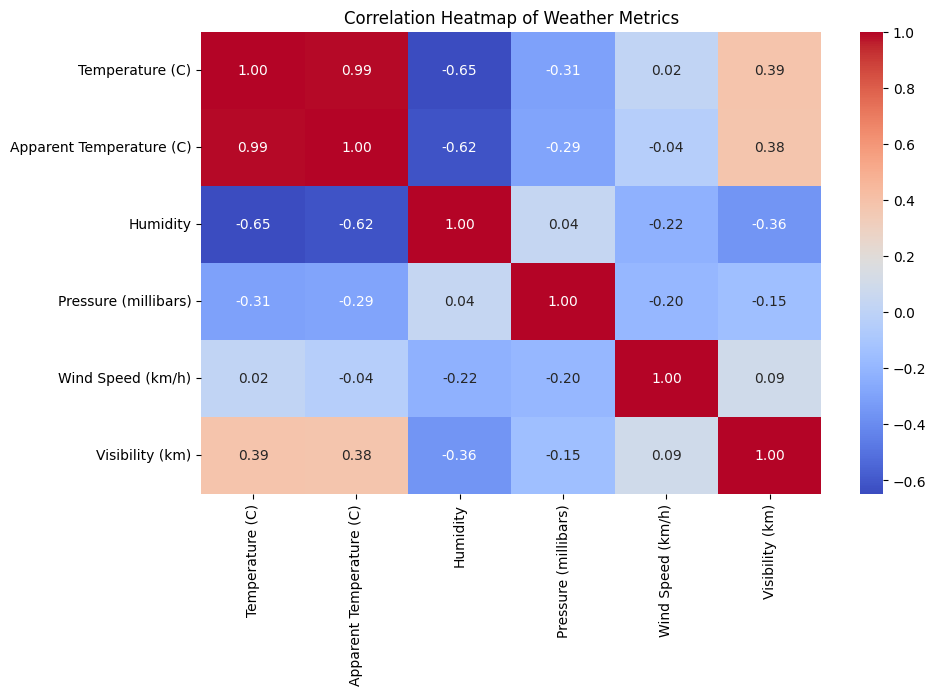

In [24]:
# Creating a heatmap to visualize correlations
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(data_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Generate the heatmap
plt.title("Correlation Heatmap of Weather Metrics")  # Add a title
plt.show()  # Display the heatmap

###  2. Histogram for Each Feature
- Generate a histogram for each selected feature


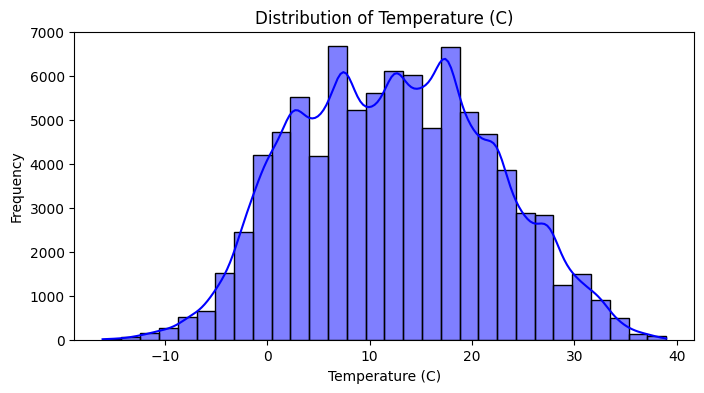

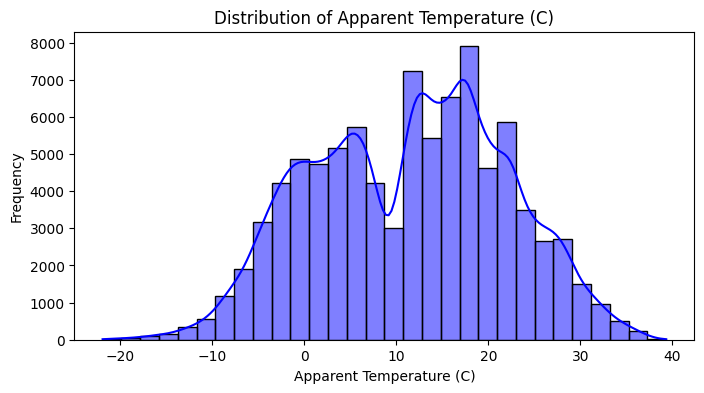

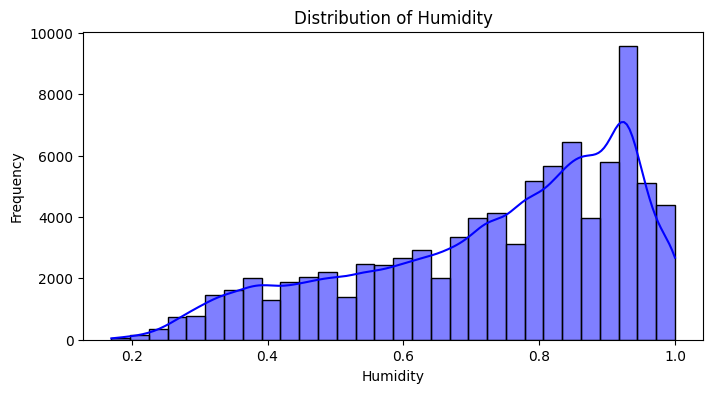

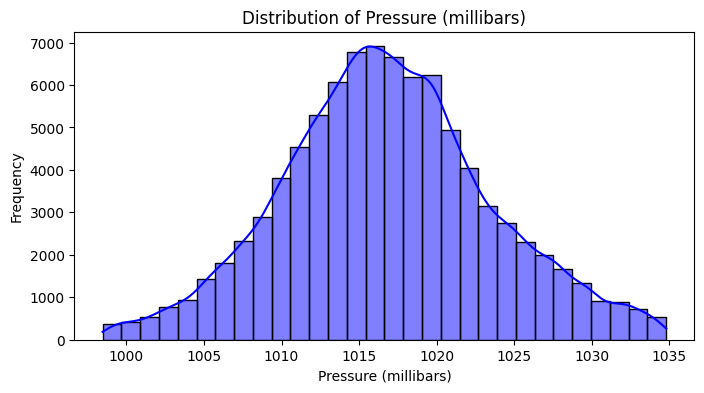

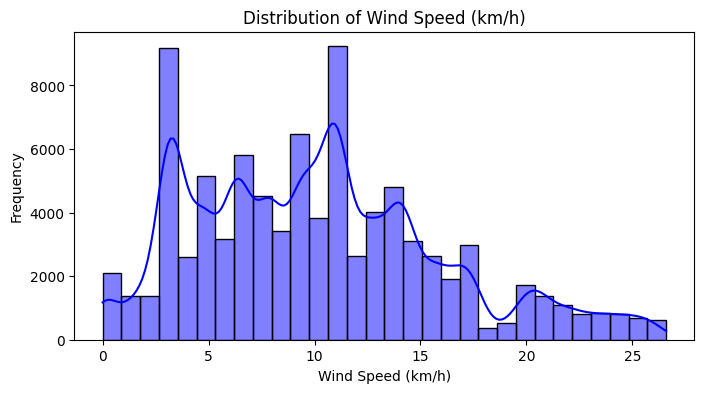

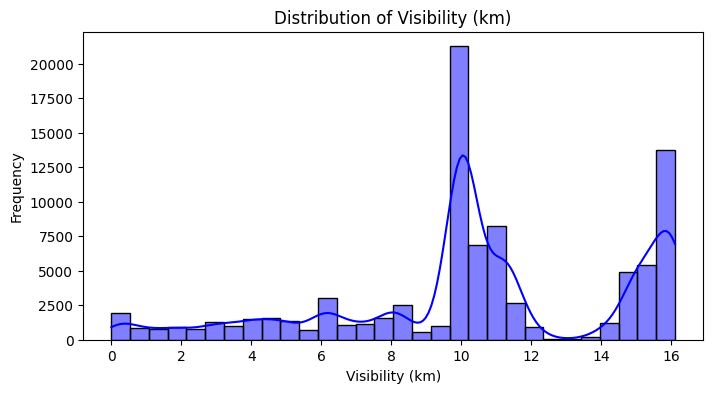

In [25]:
# Generate a histogram for each selected feature
for column in data_selected:
    plt.figure(figsize=(8, 4))  # Set the figure size
    sns.histplot(data[column], kde=True, color='blue', bins=30)  # Create a histogram with a KDE
    plt.title(f'Distribution of {column}')  # Add a title for the histogram
    plt.xlabel(column)  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.show()  # Display the histogram


### 3. Pairplot 
- Pairplot with relationships between features.

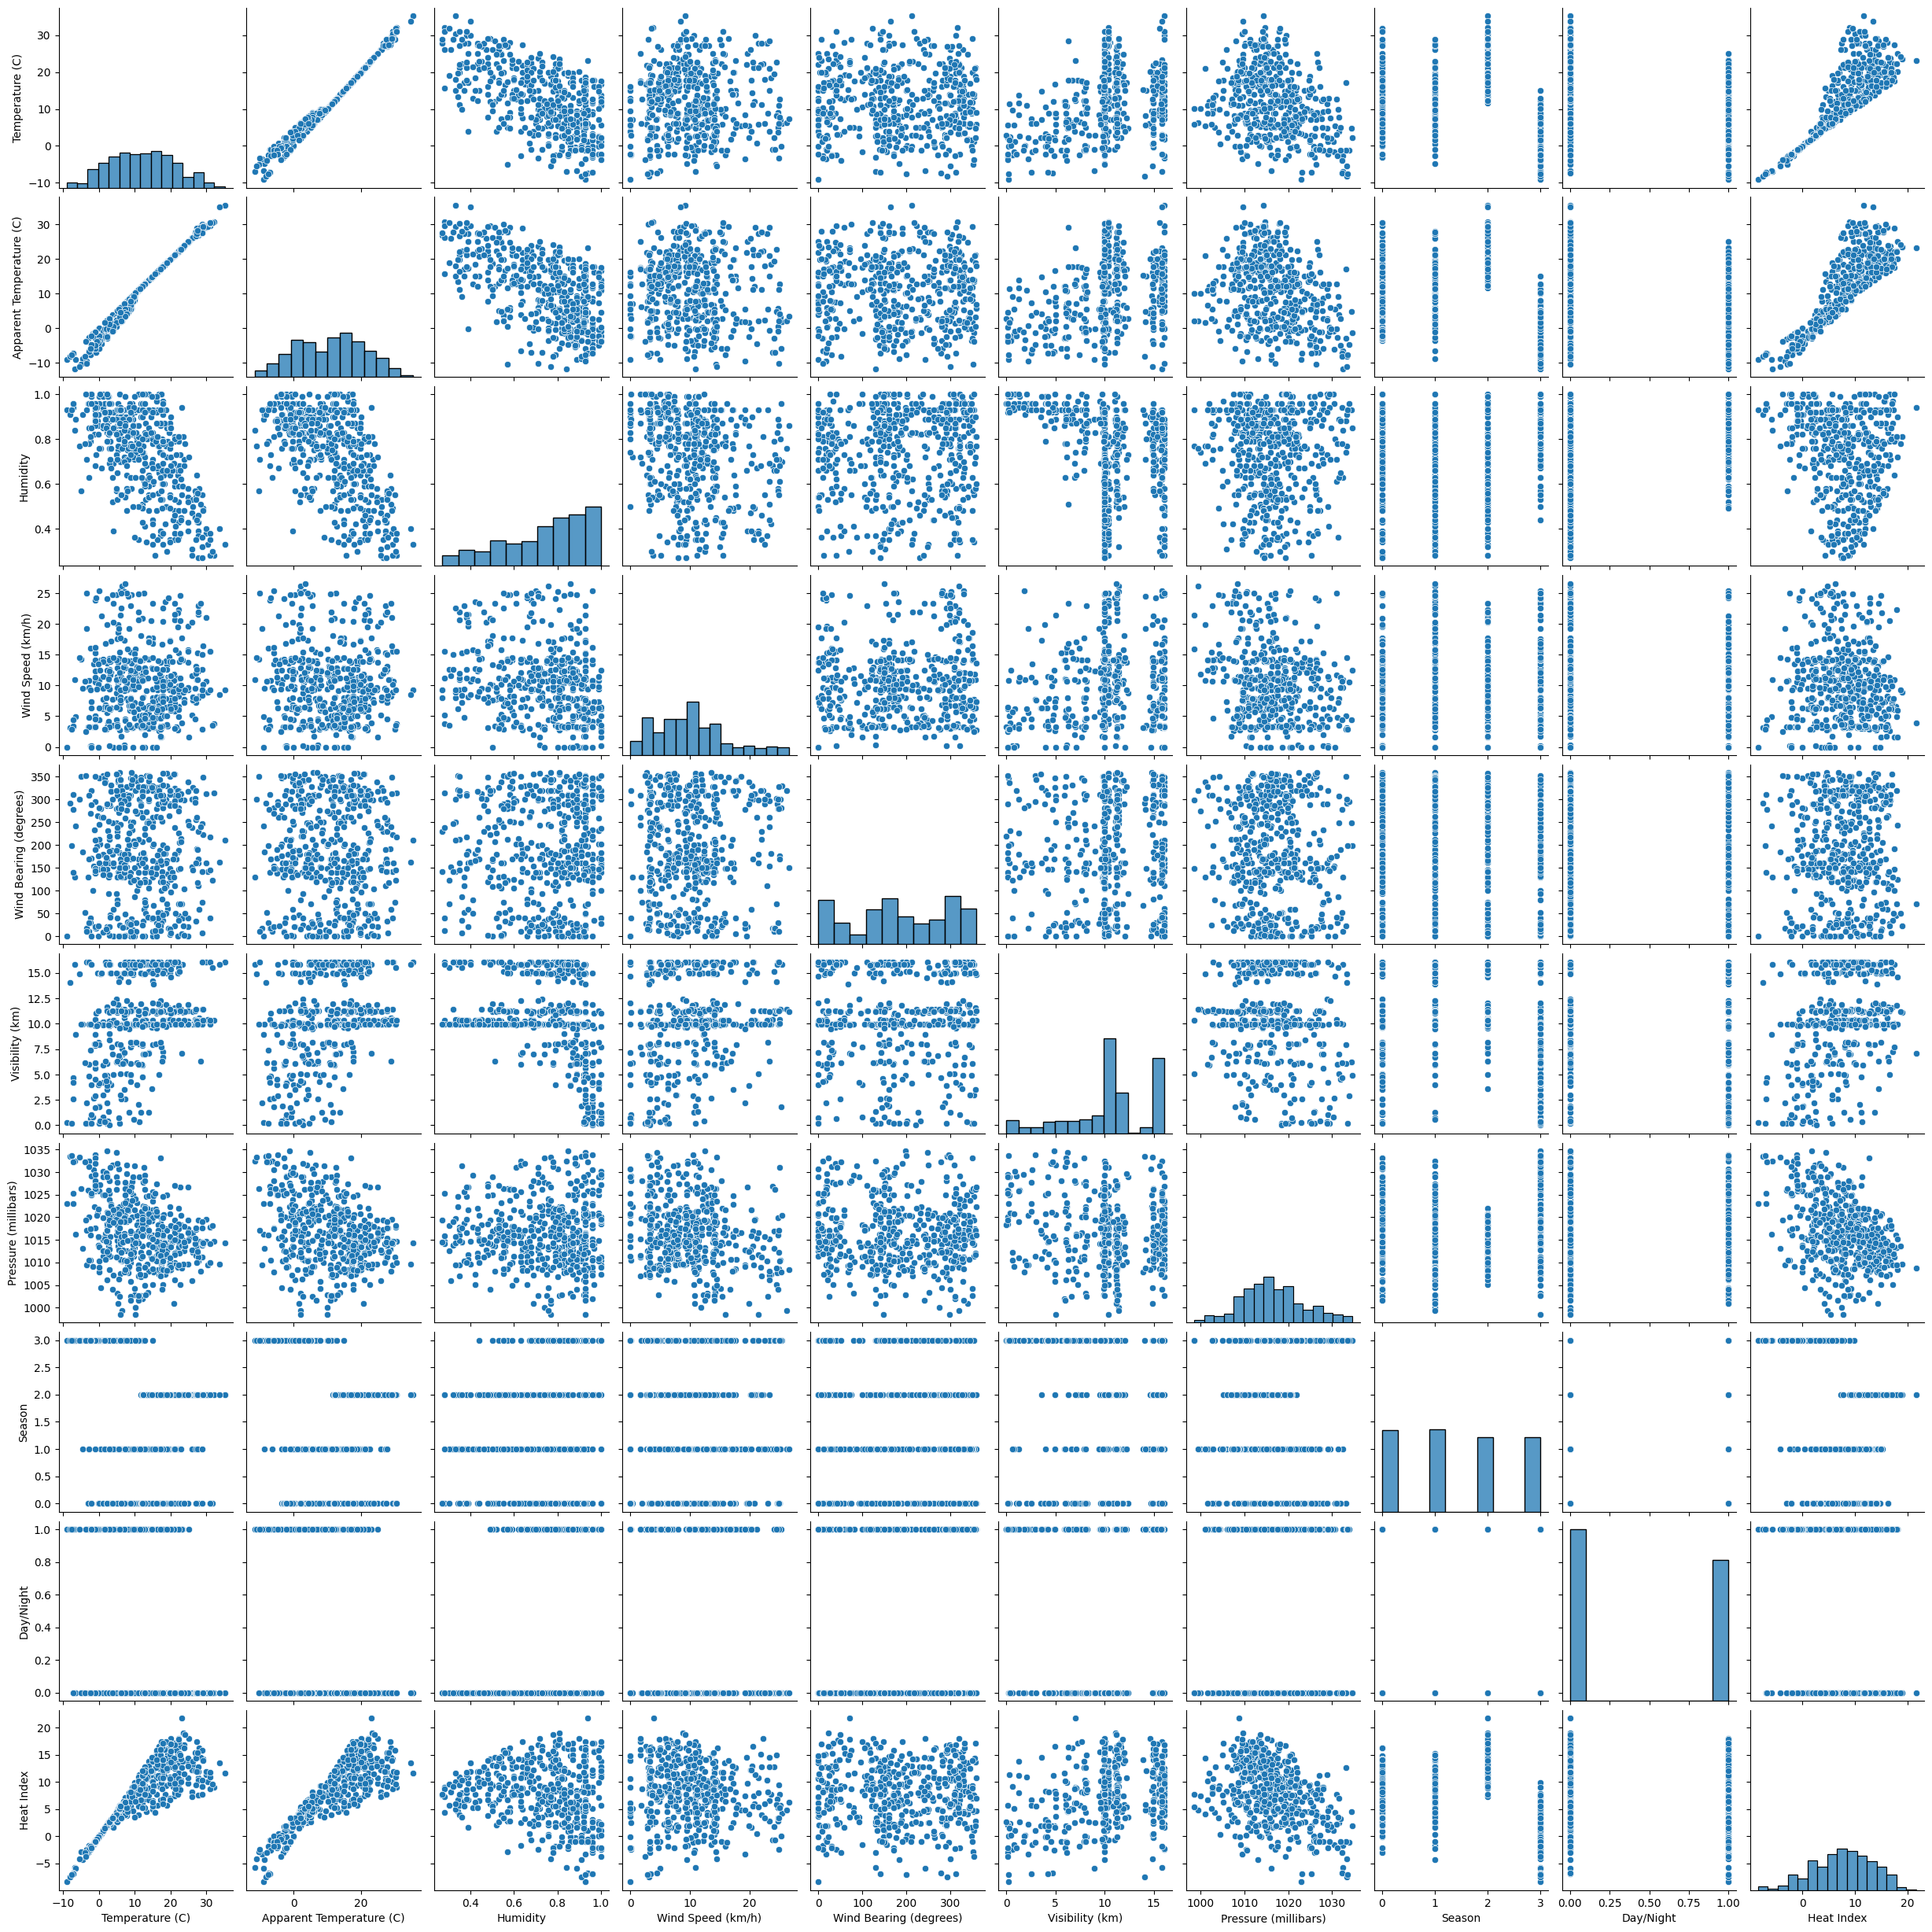

In [26]:
# Additional EDA: Pairplot for numerical features (subset for better visualization)
sample_data = data.sample(500, random_state=42)  # Sampling for better visualization
sns.pairplot(sample_data[numerical_features.columns])
plt.show()


### 4. Box Plots 
-  Identify outliers in individual features.


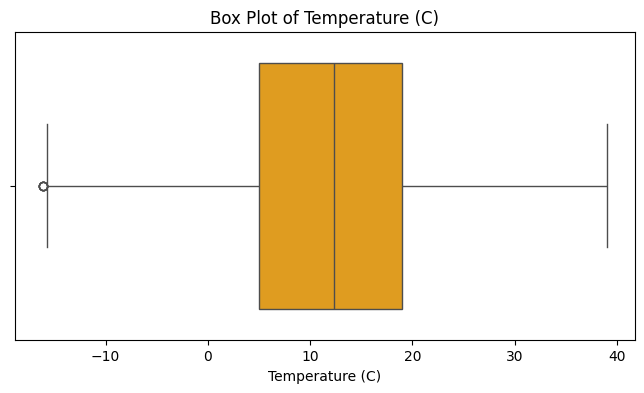

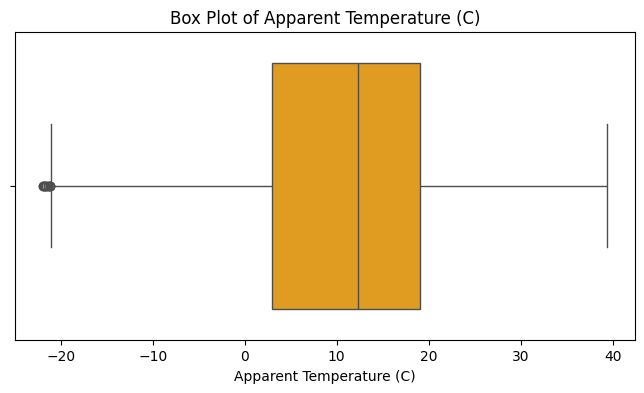

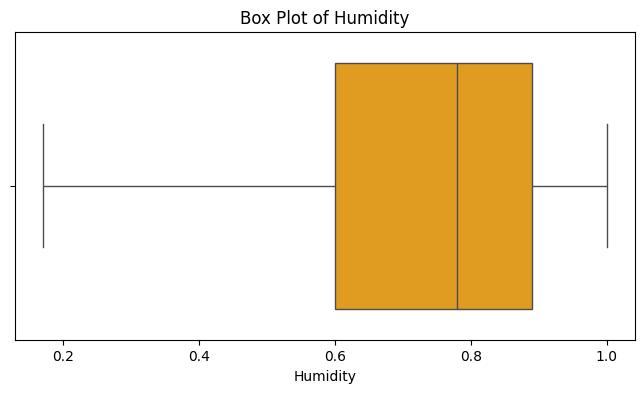

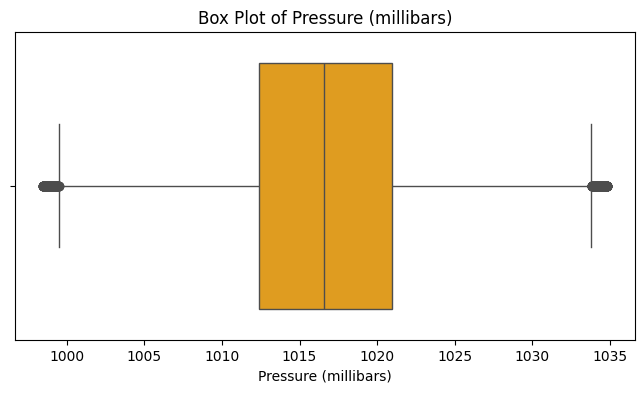

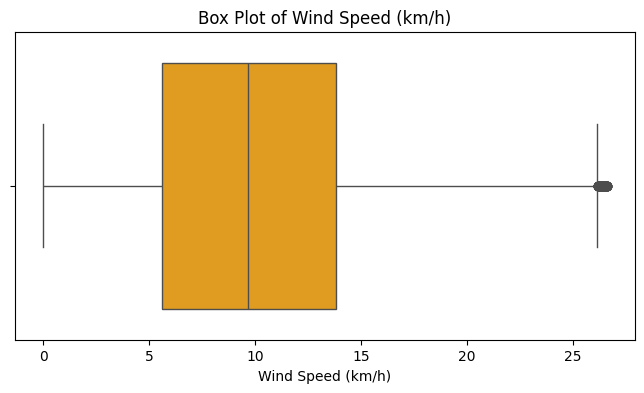

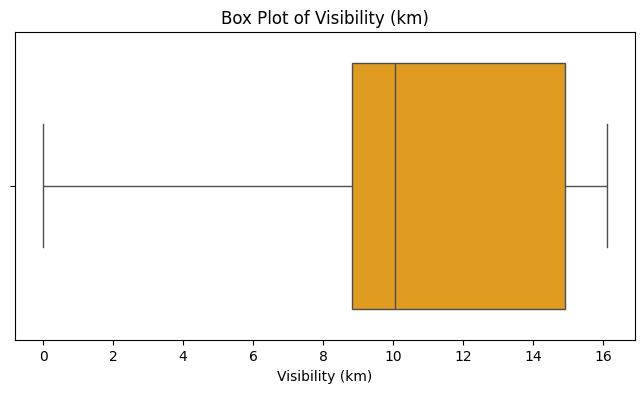

In [27]:
for column in data_selected:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color='orange')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


* Remove outlier

In [28]:
# Calculating Q1, Q3, and IQR for the selected columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns  # Selecting numeric columns only

# Function to remove outliers based on IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1               # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        
        # Filtering data to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Applying the function to remove outliers
cleaned_data = remove_outliers(data, numeric_columns)

# Displaying the number of rows before and after outlier removal
data.shape, cleaned_data.shape


((89181, 16), (87922, 16))

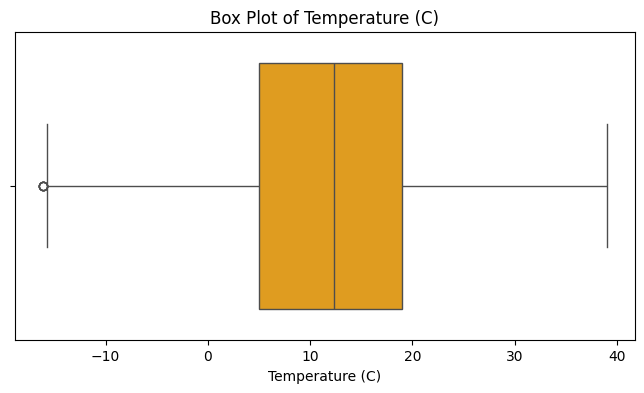

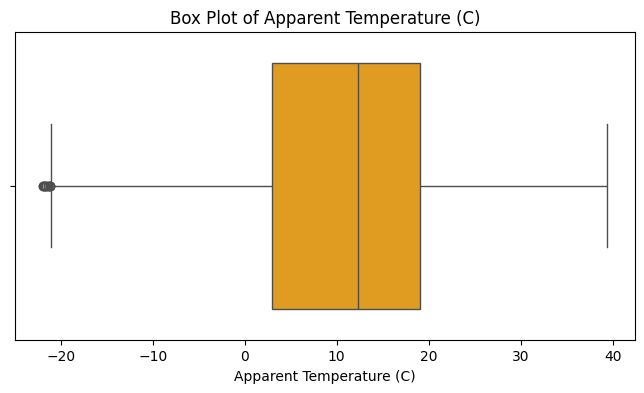

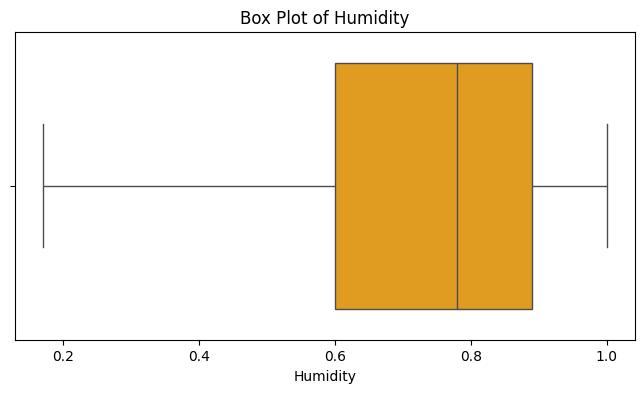

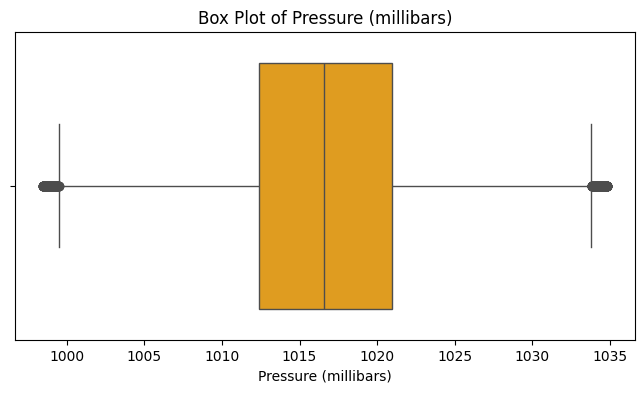

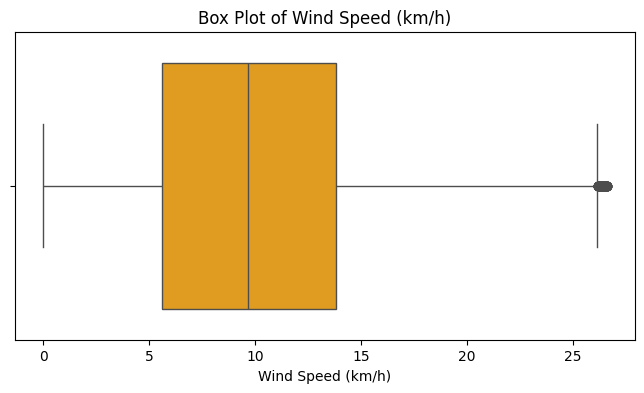

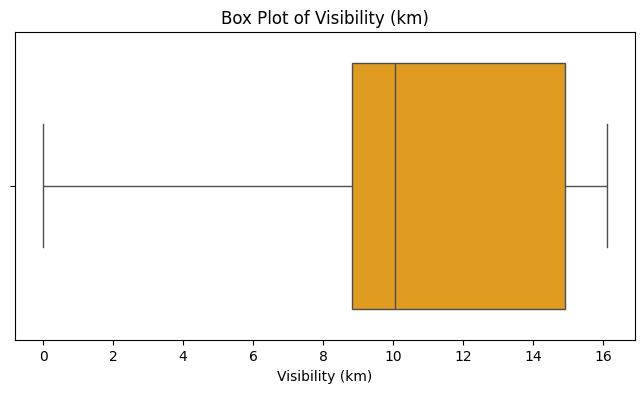

In [29]:
for column in data_selected:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color='orange')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


### 5. Line Plot for Trends
-  Visualize temporal trends, such as temperature over time.

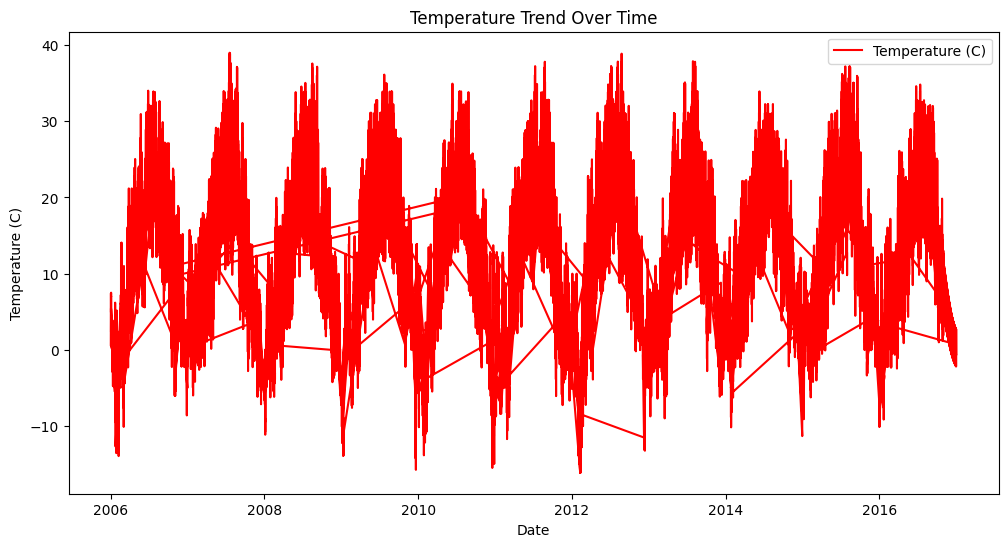

In [30]:
# Plot the temperature trend over time
plt.figure(figsize=(12, 6))
plt.plot(data['Formatted Date'], data['Temperature (C)'], label='Temperature (C)', color='red')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()


### 6. Scatter Plot
- Analyze relationships between two features.

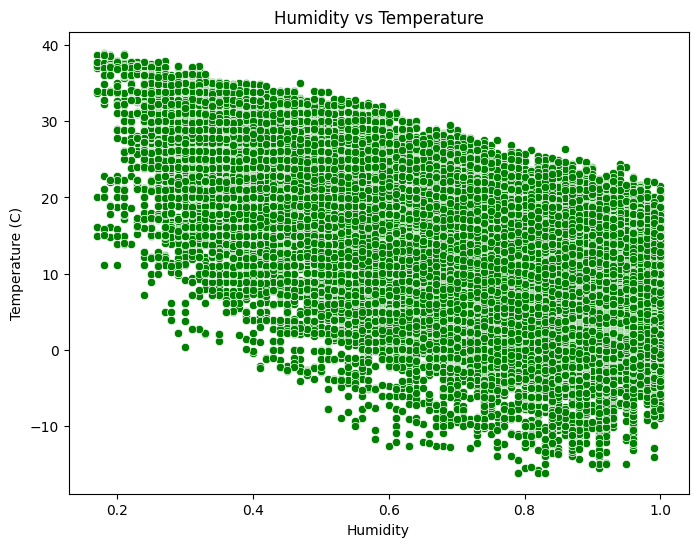

In [31]:
#Analyze relationships between Humidity vs Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Humidity'], y=data['Temperature (C)'], color='green')
plt.title('Humidity vs Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.show()


### 7. Count Plot (for Categorical Features)
- Visualize counts of each category.

C:\Users\Jatin\AppData\Local\Temp\ipykernel_504\31451822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)


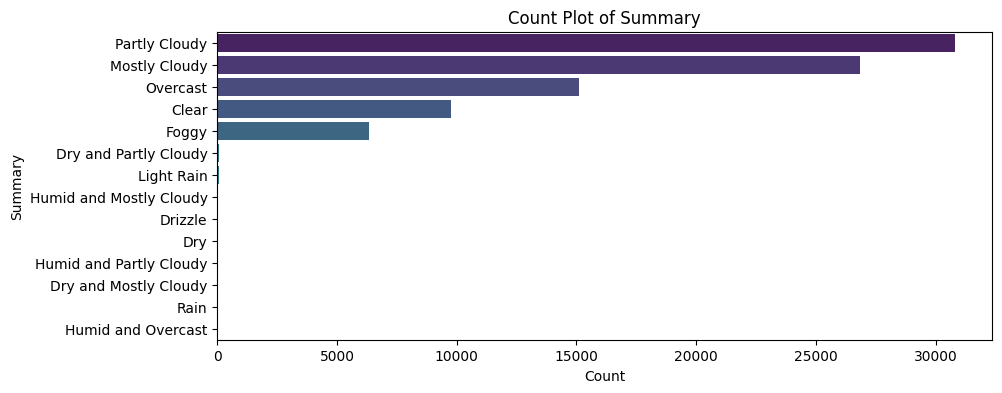

C:\Users\Jatin\AppData\Local\Temp\ipykernel_504\31451822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)


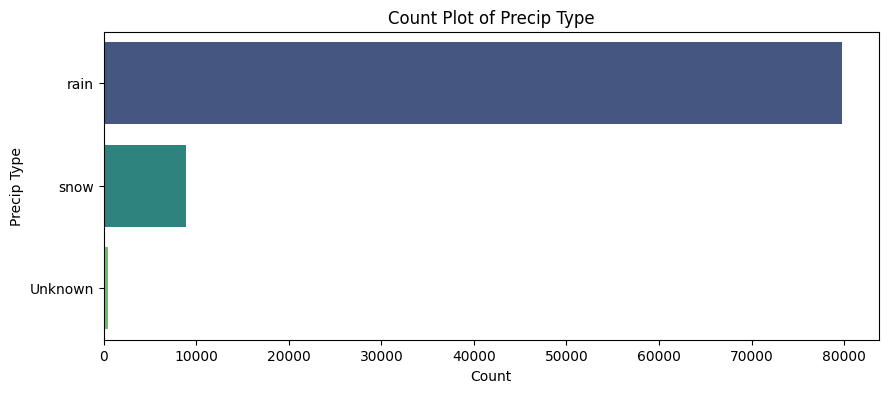

C:\Users\Jatin\AppData\Local\Temp\ipykernel_504\31451822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)


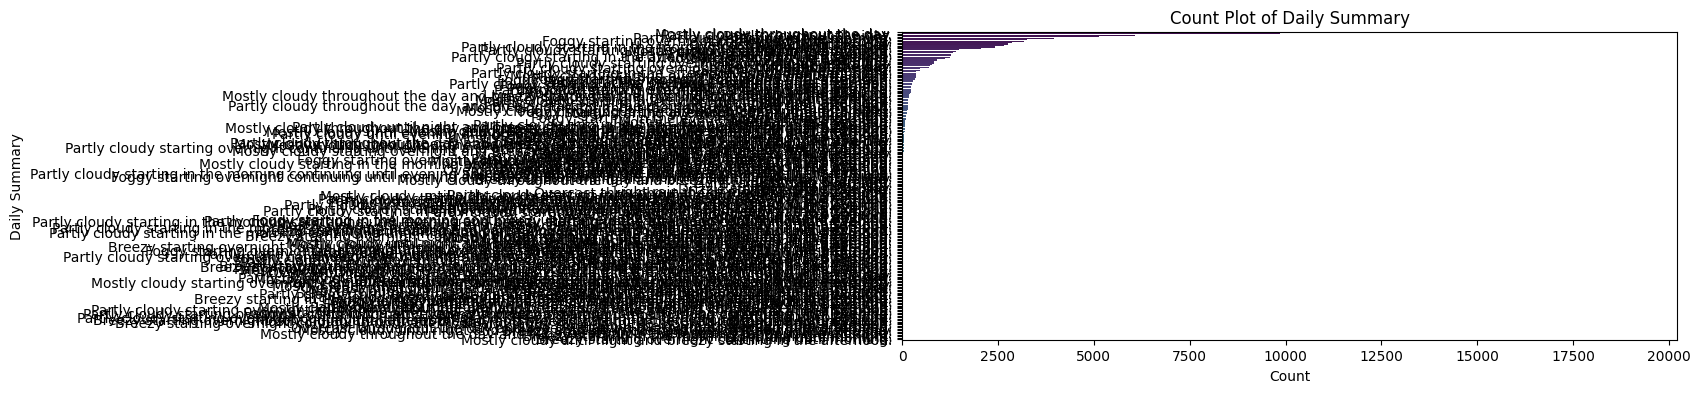

In [32]:
categorical_features = data.select_dtypes(include=['object'])
for column in categorical_features.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()
 

In [33]:
# Displaying the column names to identify potential categorical columns
data.columns

# Checking unique values in categorical-like columns to determine a candidate for count plotting
summary_counts = data['Summary'].value_counts() if 'Summary' in data.columns else None
precip_counts = data['Precip Type'].value_counts() if 'Precip Type' in data.columns else None

summary_counts, precip_counts


(Summary
 Partly Cloudy              30829
 Mostly Cloudy              26856
 Overcast                   15097
 Clear                       9778
 Foggy                       6334
 Dry and Partly Cloudy         77
 Light Rain                    56
 Humid and Mostly Cloudy       39
 Drizzle                       37
 Dry                           30
 Humid and Partly Cloudy       17
 Dry and Mostly Cloudy         14
 Rain                          10
 Humid and Overcast             7
 Name: count, dtype: int64,
 Precip Type
 rain       79740
 snow        8946
 Unknown      495
 Name: count, dtype: int64)

### ---> Data Preprocessing
-  Encode categorical variables

In [34]:
# Encode categorical variables (e.g., 'Precip Type')
label_encoder = LabelEncoder()
data['Precip Type'] = label_encoder.fit_transform(data['Precip Type'])
data['Summary'] = label_encoder.fit_transform(data['Summary'])


## Step 4: Scaleing Features


In [35]:
# Scale numerical features
numerical_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
                     'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [36]:
# Define features and target variable
X = data.drop('Summary', axis=1)
y = data['Summary']


In [37]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(X_train.dtypes)


Formatted Date              datetime64[ns, UTC]
Precip Type                               int64
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                            object
Month                                     int32
Hour                                      int32
Season                                    int64
Day/Night                                 int64
Heat Index                              float64
dtype: object


In [39]:
# Drop the original datetime column if present in the feature set
X_train = X_train.drop(columns=['Formatted Date'], errors='ignore')
X_test = X_test.drop(columns=['Formatted Date'], errors='ignore')

In [40]:
X_train = X_train.drop(columns=['Daily Summary'], errors='ignore')
X_test = X_test.drop(columns=['Daily Summary'], errors='ignore')


## Step 5: Predictive modeling - ML Algorithms
--------------------------------------------------------------------------------------------------------
Developing
- Random Forest
- Gradient Boosting
- Support Vector Machine (SVM)
* Compare them



### 1. Random Forest


In [41]:
#  Model Training and Evaluation - Random Forest
print("Training Random Forest...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, zero_division=0, output_dict=True)

# Print Accuracy
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, zero_division=0, output_dict=True)




Training Random Forest...
Random Forest Model Accuracy: 0.64


In [42]:
print(f"Number of features in X: {len(X.columns)}")
print(f"Number of feature importances: {len(rf_model.feature_importances_)}")


Number of features in X: 15
Number of feature importances: 13


In [43]:
if len(X.columns) > len(rf_model.feature_importances_):
    X = X.iloc[:, :len(rf_model.feature_importances_)]  # Trim X to match importances
elif len(rf_model.feature_importances_) > len(X.columns):
    feature_importances = rf_model.feature_importances_[:len(X.columns)]  # Trim importances


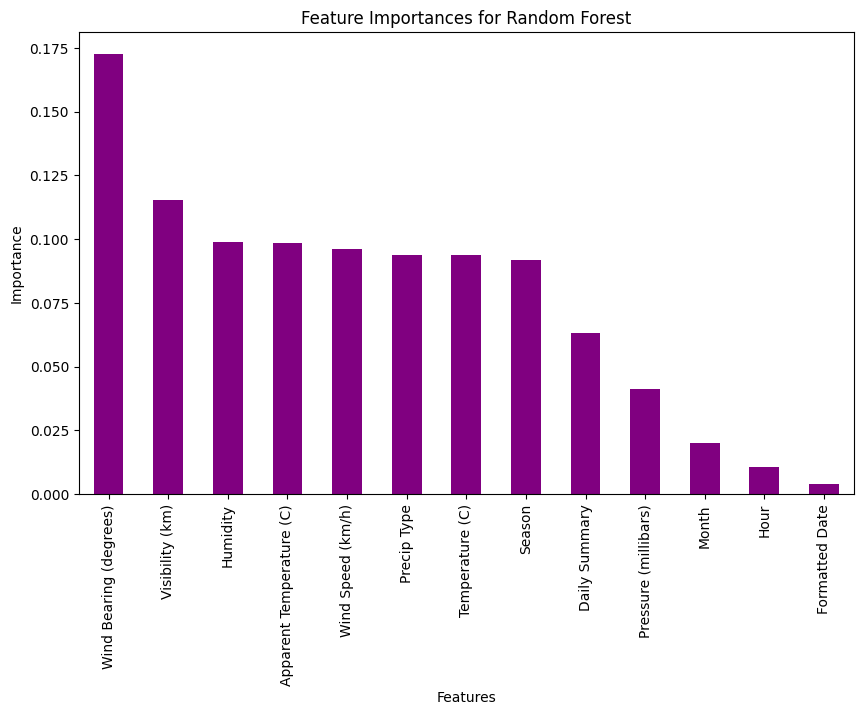

In [44]:
# Feature Importance for Random Forest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
rf_feature_importances.plot(kind='bar', color='purple')
plt.title('Feature Importances for Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


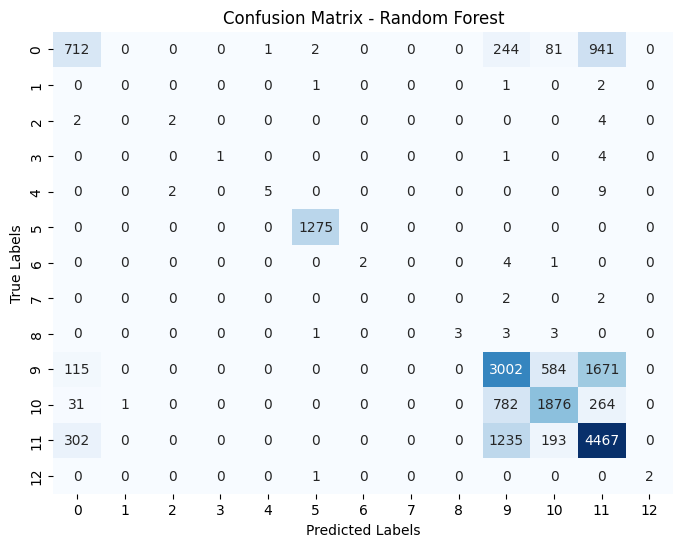

In [45]:
# Display Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [46]:
# Display Classification Report for Random Forest
report_rf_df = pd.DataFrame(report_rf).transpose()
print("\nClassification Report - Random Forest:")
print(report_rf_df)


Classification Report - Random Forest:
              precision    recall  f1-score      support
0              0.612737  0.359414  0.453070   1981.00000
1              0.000000  0.000000  0.000000      4.00000
2              0.500000  0.250000  0.333333      8.00000
3              1.000000  0.166667  0.285714      6.00000
4              0.833333  0.312500  0.454545     16.00000
5              0.996094  1.000000  0.998043   1275.00000
6              1.000000  0.285714  0.444444      7.00000
8              0.000000  0.000000  0.000000      4.00000
9              1.000000  0.300000  0.461538     10.00000
10             0.569207  0.558824  0.563968   5372.00000
11             0.685172  0.635071  0.659171   2954.00000
12             0.606600  0.720833  0.658801   6197.00000
13             1.000000  0.666667  0.800000      3.00000
accuracy       0.636150  0.636150  0.636150      0.63615
macro avg      0.677165  0.404284  0.470202  17837.00000
weighted avg   0.637330  0.636150  0.630781  178

### 2. Gradient Boosting


In [47]:
# Step 7: Model Training and Evaluation - Gradient Boosting
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb, zero_division=0, output_dict=True)

print(f"\nGradient Boosting Model Accuracy: {accuracy_gb:.2f}")


Training Gradient Boosting...

Gradient Boosting Model Accuracy: 0.55


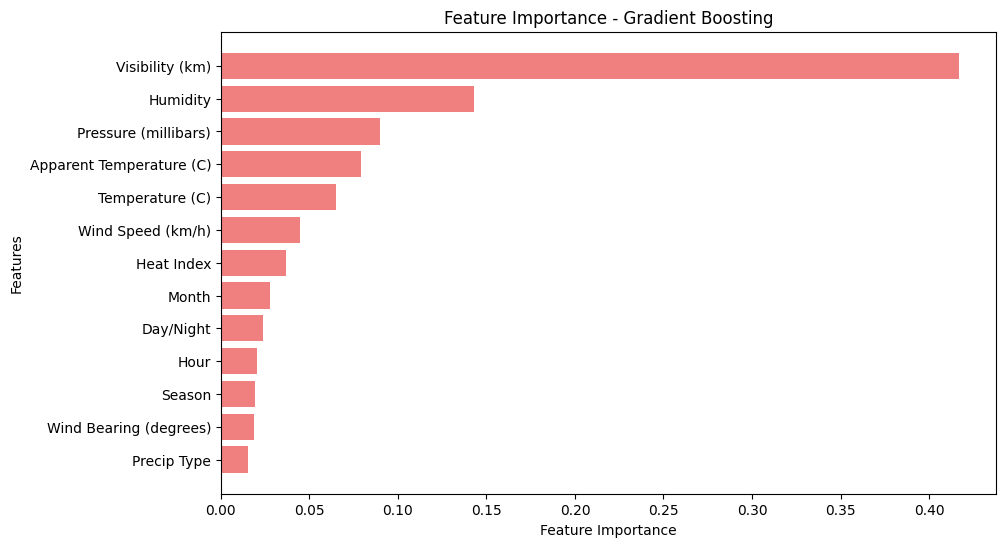

In [48]:
# Feature Importance for Gradient Boosting
feature_importance_gb = gb_model.feature_importances_

features = X_train.columns  # Use the training dataset's column names



# Creating a DataFrame for Gradient Boosting Feature Importance
importance_gb_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance_gb
}).sort_values(by='Importance', ascending=False)

# Plotting Feature Importance for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(importance_gb_df['Feature'], importance_gb_df['Importance'], color='lightcoral')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

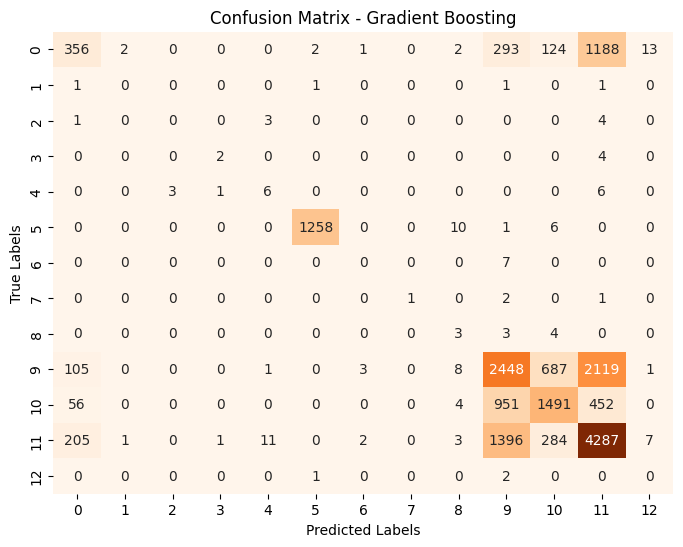

In [49]:
# Display Confusion Matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [50]:
# Display Classification Report for Gradient Boosting
report_gb_df = pd.DataFrame(report_gb).transpose()
print("\nClassification Report - Gradient Boosting:")
print(report_gb_df)



Classification Report - Gradient Boosting:
              precision    recall  f1-score       support
0              0.491713  0.179707  0.263216   1981.000000
1              0.000000  0.000000  0.000000      4.000000
2              0.000000  0.000000  0.000000      8.000000
3              0.500000  0.333333  0.400000      6.000000
4              0.285714  0.375000  0.324324     16.000000
5              0.996830  0.986667  0.991723   1275.000000
6              0.000000  0.000000  0.000000      7.000000
8              1.000000  0.250000  0.400000      4.000000
9              0.100000  0.300000  0.150000     10.000000
10             0.479624  0.455696  0.467354   5372.000000
11             0.574345  0.504739  0.537297   2954.000000
12             0.531754  0.691786  0.601304   6197.000000
13             0.000000  0.000000  0.000000      3.000000
accuracy       0.552335  0.552335  0.552335      0.552335
macro avg      0.381537  0.313610  0.318094  17837.000000
weighted avg   0.550880  0.5

### 3. Support Vector Machine (SVM)


In [51]:
# Model Training and Evaluation - Support Vector Machine (SVM)
print("Training Support Vector Machine...")
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm,zero_division=0, output_dict=True)

print(f"\nSupport Vector Machine Model Accuracy: {accuracy_svm}")


Training Support Vector Machine...

Support Vector Machine Model Accuracy: 0.4062902954532713


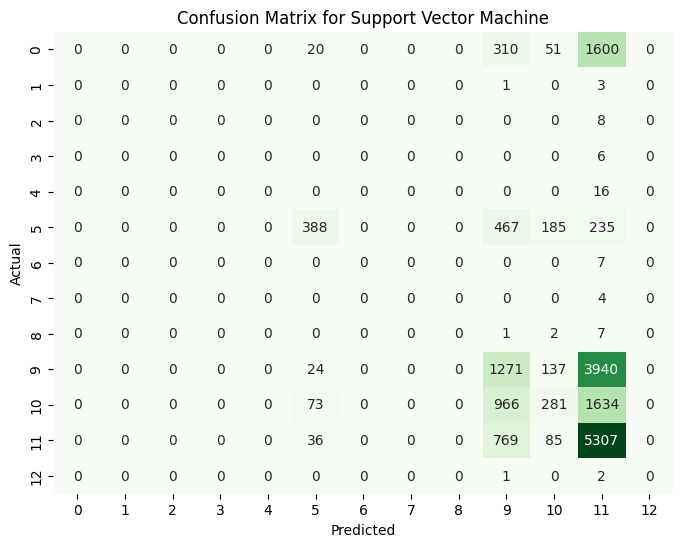

In [52]:
# Visualization of SVM Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [53]:
#  Display Classification Report for Support Vector Machine
try:
    # Converting Classification Report to a DataFrame
    report_svm_df = pd.DataFrame(report_svm).transpose()
    print("\nClassification Report - Support Vector Machine:")
    print(report_svm_df)
except Exception as e:
    print(f"Error displaying SVM Classification Report: {e}")



Classification Report - Support Vector Machine:
              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000   1981.00000
1              0.000000  0.000000  0.000000      4.00000
2              0.000000  0.000000  0.000000      8.00000
3              0.000000  0.000000  0.000000      6.00000
4              0.000000  0.000000  0.000000     16.00000
5              0.717190  0.304314  0.427313   1275.00000
6              0.000000  0.000000  0.000000      7.00000
8              0.000000  0.000000  0.000000      4.00000
9              0.000000  0.000000  0.000000     10.00000
10             0.335711  0.236597  0.277572   5372.00000
11             0.379217  0.095125  0.152097   2954.00000
12             0.415616  0.856382  0.559633   6197.00000
13             0.000000  0.000000  0.000000      3.00000
accuracy       0.406290  0.406290  0.406290      0.40629
macro avg      0.142133  0.114801  0.108970  17837.00000
weighted avg   0.359569  0.406290  0.33

## Step 6 : Visualization of Results


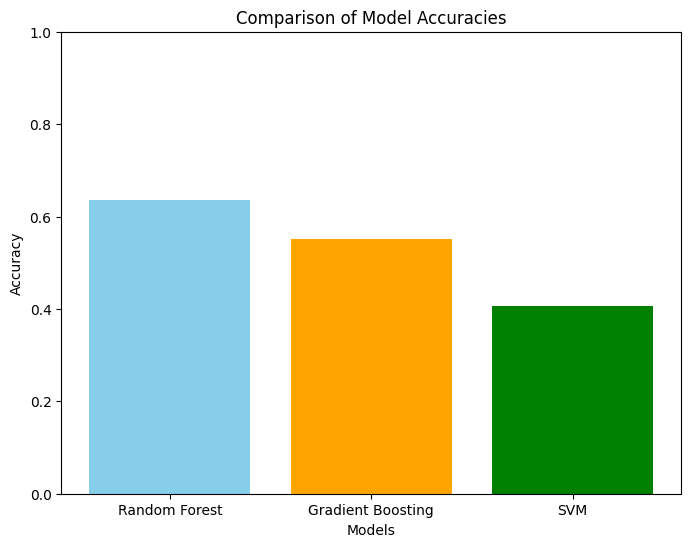

In [54]:

# Compare model accuracies
plt.figure(figsize=(8, 6))
accuracies = [accuracy_rf, accuracy_gb, accuracy_svm]
models = ['Random Forest', 'Gradient Boosting', 'SVM']
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()
